In [1]:
from astropy.io import fits
import numpy as np
from astropy.visualization import simple_norm
import pylab as plt
from astropy import wcs
import os
from reproject import reproject_interp
import PIL
#import pyavm
import shutil
from matplotlib.colors import LinearSegmentedColormap
from astropy.wcs import WCS

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F300M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

reproj_dir = '/orange/adamginsburg/jwst/w51/data_reprojected_140_expanded/'
repr480_image_filenames = {x: y.replace("i2d", "i2d_reprj_f140") for x,y in image_filenames.items()}
repr480_image_filenames = {x: (reproj_dir+os.path.basename(y)) for x,y in repr480_image_filenames.items()}



ref_fits = fits.open(image_filenames['f140m'])
tgt_header = fits.getheader(image_filenames['f140m'], ext=('SCI', 1))
wcs_header = WCS(tgt_header)


import reproject
from astropy.coordinates import FK5
def expand_wcs_to_cover_all(reference_wcs, input_hdus):
    """
    Expand a WCS (keeping its orientation & pixel scale) to cover
    the footprints of all given HDUs.
    """
    # Get pixel scale (deg/pix)
    cdelt = np.abs(reference_wcs.wcs.cdelt)

    # Convert all images' corners to world coords, then to pixel coords in ref WCS
    all_pixels = []
    for hdu in input_hdus:
        wcs_in = WCS(hdu.header)
        ny, nx = hdu.data.shape
        corners_pix = np.array([[0,0],[nx,0],[0,ny],[nx,ny]])
        corners_world = wcs_in.all_pix2world(corners_pix, 0)
        corners_in_refpix = reference_wcs.all_world2pix(corners_world, 0)
        all_pixels.append(corners_in_refpix)

    all_pixels = np.vstack(all_pixels)

    # Find bounding box in reference pixel coordinates
    xmin, ymin = np.floor(all_pixels.min(axis=0)).astype(int)
    xmax, ymax = np.ceil(all_pixels.max(axis=0)).astype(int)

    # Compute new shape
    new_nx = xmax - xmin
    new_ny = ymax - ymin

    # Shift CRPIX so that old reference origin moves accordingly
    new_wcs = reference_wcs.deepcopy()
    new_wcs.wcs.crpix -= [xmin, ymin]

    return new_wcs, (new_ny, new_nx)

# --- Usage ---
filters = ['f140m', 'f770w', 'f1280w', 'f2100w']
files = [image_filenames[filt] for filt in filters]
hdus = [fits.open(f)['SCI'] for f in files]

# Expand reference WCS to cover all images
expanded_wcs, shape_out = expand_wcs_to_cover_all(WCS(hdus[0].header), hdus)

## Reproject each image into expanded WCS
#for i, hdu in enumerate(hdus):
#    array, footprint = reproject_interp(hdu, expanded_wcs, shape_out=shape_out)
#    fits.writeto(f"/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/{filters[i]}.fits", array, expanded_wcs.to_header(), overwrite=True)

Set DATE-AVG to '2025-05-06T16:59:22.406' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-08T11:31:04.265' from MJD-AVG.
Set DATE-END to '2024-09-08T12:43:52.463' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.803760 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291894033.527 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-08T11:47:44.336' from MJD-AVG.
Set DATE-END to '2024-09-08T13:00:37.070' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.791203 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291801554.144 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2024-09-08T11:55:48.768' from MJD-AVG.
Set DATE-END to '2024-09-08T13:08:42.701' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.785099 from OBSGEO-[XYZ].
Set OBSGEO-H to 1291756623.231 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(np.int64(9522), np.int64(11453))
(9522, 11454) (9522, 11454) (9522, 11454)


Set DATE-AVG to '2025-05-06T16:59:22.406' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/scratch/local/13873398/ipykernel_3313141/3197304196.py:105: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax.annotate('W51-IRS2', xy=(0.3, 0.55), xycoords='axes fraction', fontsize=30, color='white', ha='left', va='center',
/scratch/local/13873398/ipykernel_3313141/3197304196.py:107: MatplotlibDeprecationWarning: the (unused) 'frac' key in 'arrowprops' was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  ax.annotate('IRS1/main shell', xy=(0.65, 0.55), xycoords='axes fraction', fontsize=30, color='white', ha='left', va='center',
/scratch/local/13873398/ipykernel_3313141/3197304196.py:109: MatplotlibDeprecationWarning: the (unused) 'frac' key in 

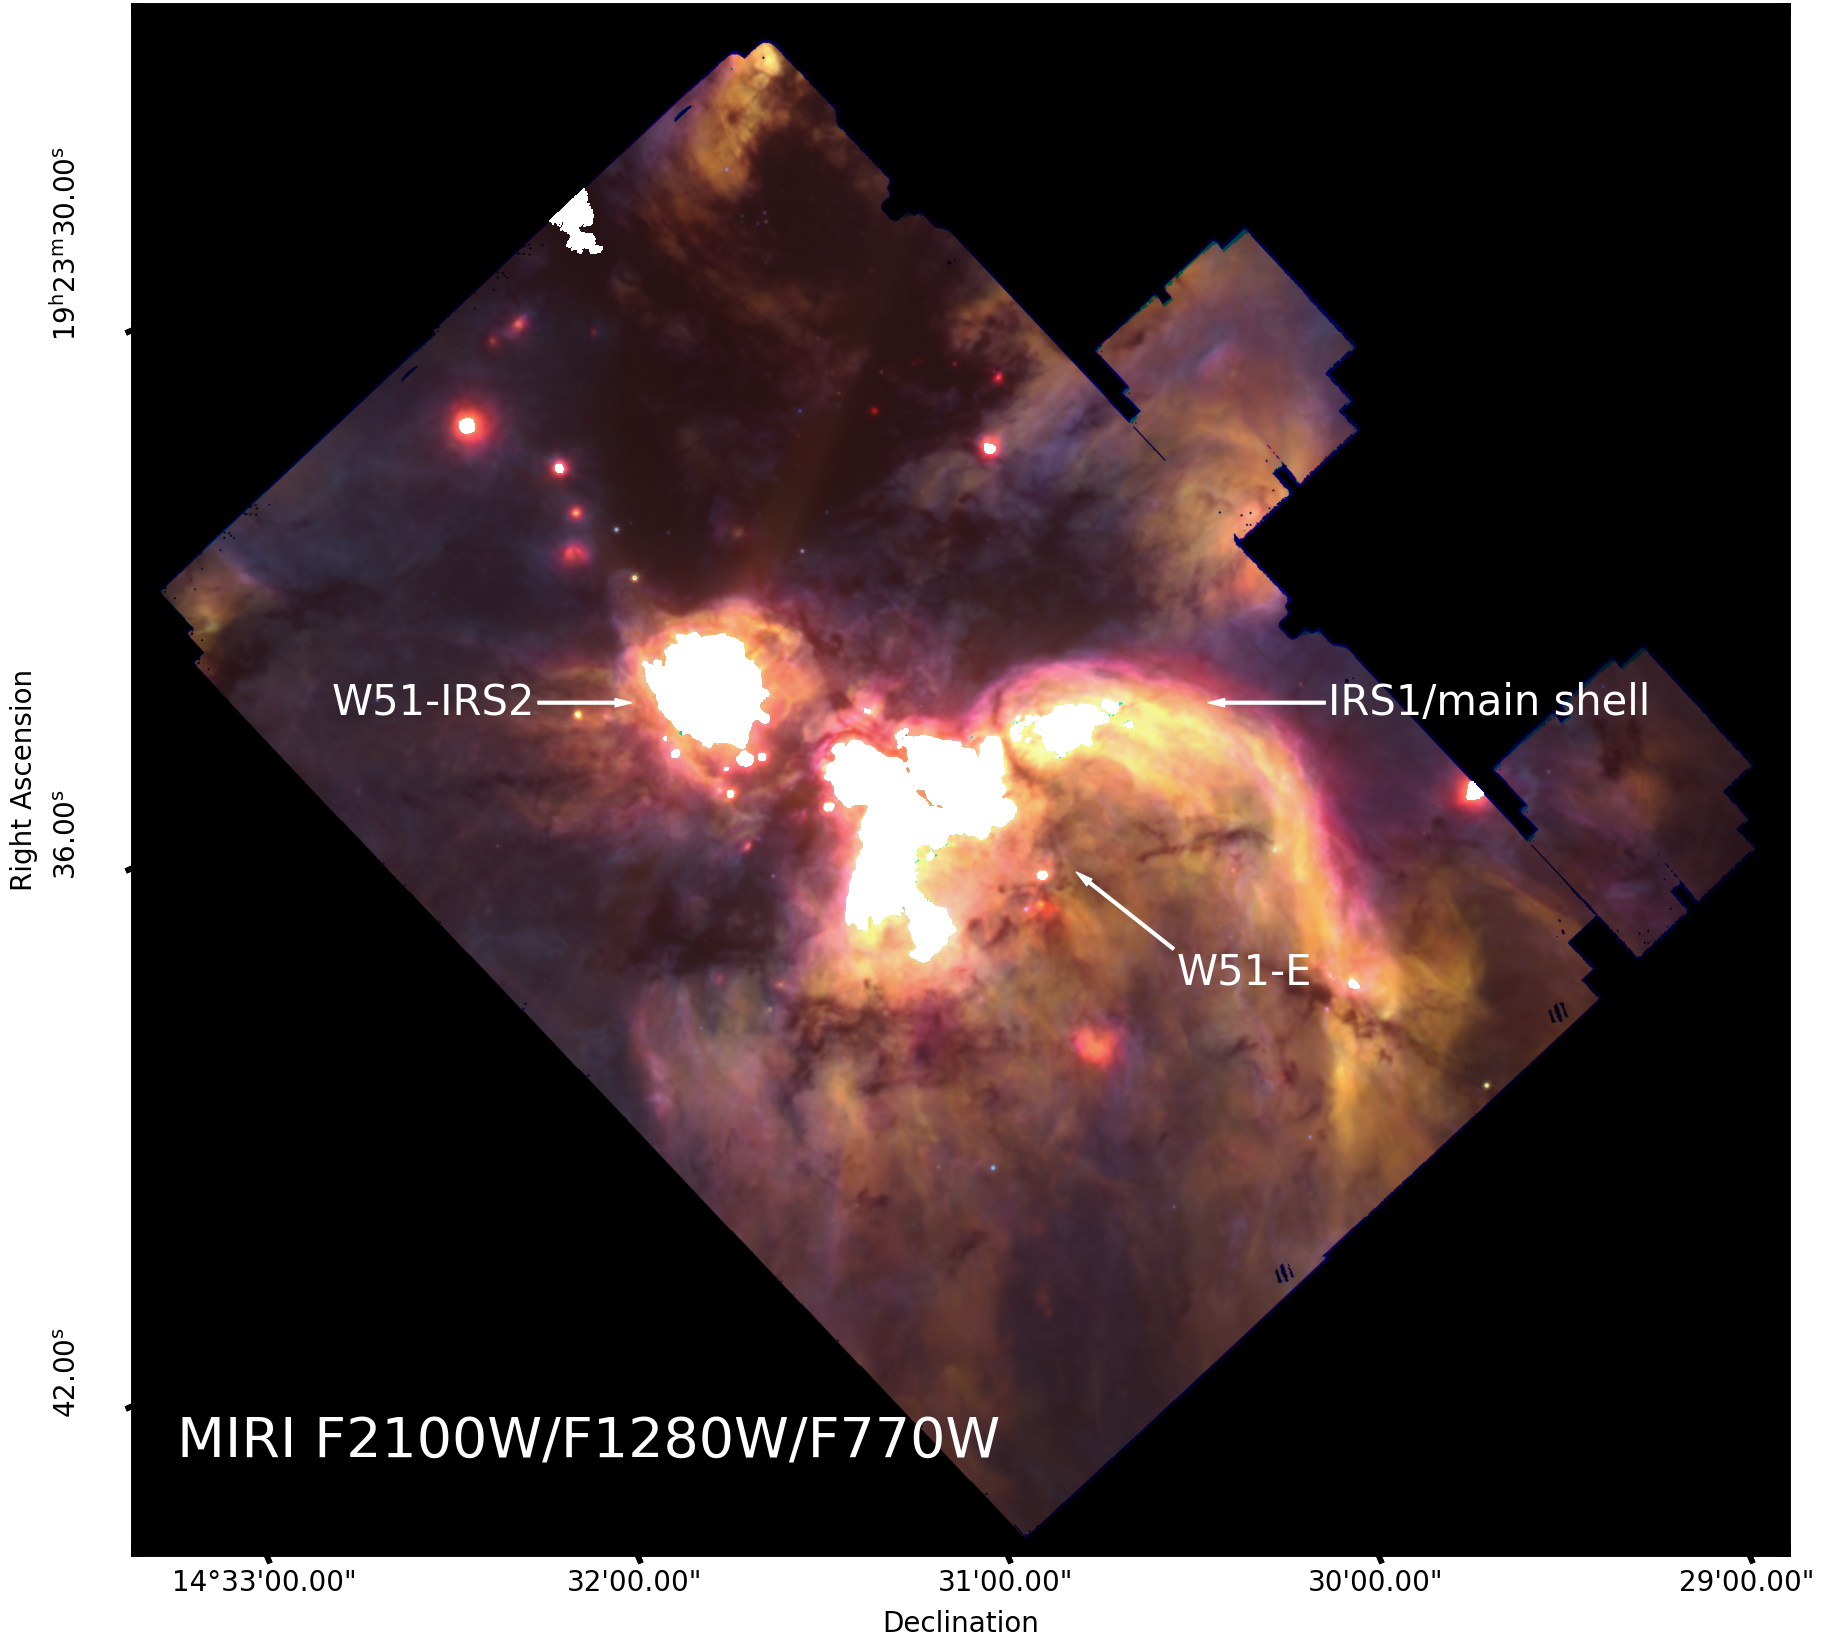

In [3]:
from matplotlib import colors
import astropy.units as u
import matplotlib as mpl
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
mpl.rcParams['axes.linewidth'] = 10
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
print(shape_out)
from regions import Regions#
#reg_dir = '/orange/adamginsburg/w51/TaehwaYoo/region_jwst_highlights/'
#nircam_footprint_reg = Regions.read(reg_dir+'nircam_footprint.reg')
#miri_footprint_reg = Regions.read(reg_dir+'miri_footprint.reg')
#w51e_reg=Regions.read(reg_dir+'w51e_area.reg')
#w51n_reg=Regions.read(reg_dir+'w51n_area.reg')

img3 = fits.getdata(repr480_image_filenames['f770w'])
img2 = fits.getdata(repr480_image_filenames['f1280w'])
img1 = fits.getdata(repr480_image_filenames['f2100w'])
print(img1.shape, img2.shape, img3.shape)
#ref_fits = fits.open('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits')
#tgt_header = fits.getheader('/orange/adamginsburg/jwst/w51/data_reprojected_140_optimal/f162m.fits')

wcs_header = WCS(tgt_header)
#nircam_footprint_pix_reg = nircam_footprint_reg[0].to_pixel(wcs_header)
#miri_footprint_pix_reg = miri_footprint_reg[0].to_pixel(wcs_header)
#w51e_pix_reg = w51e_reg[0].to_pixel(wcs_header)
#w51n_pix_reg = w51n_reg[0].to_pixel(wcs_header)
# Opacity for each layer (0=transparent, 1=opaque)
alpha_magenta = 1
alpha_yellow  = 1
alpha_cyan    = 1

# Normalize each image
#norm1 = simple_norm(img1, stretch='asinh', min_percent=1, max_percent=99)
#norm2 = simple_norm(img2, stretch='asinh', min_percent=1, max_percent=99)
#norm3 = simple_norm(img3, stretch='asinh', min_percent=1, max_percent=97)

norm3 = simple_norm(img3, stretch='sqrt', vmin=-51.14007967778583, vmax=7126.073761523704)
norm2 = simple_norm(img2, stretch='sqrt', vmin=-78.5121242434257, vmax=11615.19925094841)
norm1 = simple_norm(img1, stretch='sqrt', vmin=-401.0899138117582, vmax=12462.252667291648)

cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])

# Map each image to its colormap and convert to RGB arrays

magenta_rgb = cmap1(norm1(img1))[...,:3] * alpha_magenta
yellow_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_yellow
cyan_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_cyan

# display nan for the nan pixels
nan_img1 = img1<-100
nan_img2 = img2<-100
nan_img3 = img3<-100
nan_all = np.logical_or.reduce((nan_img1, nan_img2, nan_img3))


# Combine by summing and clipping
composite = magenta_rgb + yellow_rgb + cyan_rgb
composite = np.clip(composite, 0, 1)
composite[nan_all] = np.nan

fig = plt.figure(figsize=(48,20), )
ax = fig.add_subplot(111, projection=wcs_header)

ax.imshow(composite, origin='lower', )

#ax.add_artist(nircam_footprint_pix_reg.as_artist(color='w', alpha=0.5, lw=3))
#ax.add_artist(miri_footprint_pix_reg.as_artist(color='w', alpha=0.5, lw=3))
#ax.add_artist(w51e_pix_reg.as_artist(color='k',  lw=4))
#ax.add_artist(w51n_pix_reg.as_artist(color='k',  lw=4))
#ax.text(0.01*composite.shape[1], 0.75*composite.shape[0], 'NIRCam F360M+F410M', color='w', fontsize=30, ha='left', va='top')
ax.text(0.15*composite.shape[1], 0.08*composite.shape[0], 'MIRI F2100W/F1280W/F770W', color='w', fontsize=40, ha='left', va='top')
#ax.text(0.6*composite.shape[1], 0.35*composite.shape[0], 'W51-E', color='k', fontsize=20, ha='left', va='top')
#ax.text(0.4*composite.shape[1], 0.75*composite.shape[0], 'W51-IRS2', color='k', fontsize=20, ha='left', va='top')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
ra.set_axislabel('Right Ascension')
ra.set_ticklabel(rotation=90, pad=30)
dec.set_axislabel('Declination')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
ax.set_xlim(1500, 10800)
ax.set_ylim(0, 8700)
ax.annotate('W51-IRS2', xy=(0.3, 0.55), xycoords='axes fraction', fontsize=30, color='white', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='white', fc='white'), textcoords='offset pixels', xytext=(-300,0))
ax.annotate('IRS1/main shell', xy=(0.65, 0.55), xycoords='axes fraction', fontsize=30, color='white', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='white', fc='white'), textcoords='offset pixels', xytext=(120,0))
ax.annotate('W51-E', xy=(0.57, 0.44), xycoords='axes fraction', fontsize=30, color='white', ha='left', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, frac=0.07, ec='white', fc='white'), textcoords='offset pixels', xytext=(100,-100))
plt.savefig('rgbs/miri_770_1280_2100.png', bbox_inches='tight')


